In [38]:
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

In [7]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [8]:
# Convert categorical data to numeric and separate target feature for training data
X_train = pd.get_dummies(train_df.drop(columns=["target"]))
y_train = train_df["target"]

In [11]:
# Convert categorical data to numeric and separate target feature for testing data
X_test = pd.get_dummies(test_df.drop(columns=["target"]))
y_test = test_df["target"]

In [12]:
# add missing dummy variables to testing set
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0


In [15]:
# Train the Logistic Regression model on the unscaled data and print the model score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf

LogisticRegression()

In [16]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\SMKazmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8162484049340706

In [17]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [18]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Train the Logistic Regression model on the scaled data and print the model score
clf1 = LogisticRegression(solver='lbfgs')
clf1.fit(X_train_scaled, y_train)
clf1.score(X_test_scaled, y_test)

C:\Users\SMKazmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8857932794555509

In [28]:
# Train a Random Forest Classifier model on the scaled data and print the model score
clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

1.0

In [32]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f"Training Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Score: {clf.score(X_test_scaled, y_test)}")

Training Score: 0.8857932794555509
Testing Score: 0.8857932794555509


C:\Users\SMKazmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
clf = RandomForestClassifier().fit(X_train_scaled, y_train)
print(f"Training Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Score: {clf.score(X_test_scaled, y_test)}")

Training Score: 1.0
Testing Score: 1.0


[3.26422481e-02 2.35262332e-02 5.67985645e-02 9.51572822e-03
 1.03727055e-02 1.50408400e-03 3.38147773e-03 5.57579064e-03
 1.04488190e-03 9.54108482e-03 7.39679237e-03 4.85511440e-02
 4.78551866e-02 6.72399000e-02 6.35549378e-02 1.32960105e-01
 2.08131009e-02 3.02721423e-04 6.29912570e-03 7.53325040e-03
 1.22956282e-01 3.49962804e-04 0.00000000e+00 0.00000000e+00
 2.54831407e-03 1.01053685e-02 3.05676045e-03 4.68970145e-03
 2.96567762e-03 4.03976369e-03 7.13347559e-03 9.46060735e-03
 9.26253666e-03 3.36020335e-03 5.10339034e-03 1.04548465e-02
 9.83962460e-03 9.48593832e-03 4.04867033e-03 4.08783633e-03
 6.09933362e-03 5.37593207e-03 9.42081991e-03 9.08632623e-03
 9.92425863e-03 2.44213030e-04 3.03499086e-05 1.06872756e-02
 1.08205416e-02 7.75507277e-03 5.44617355e-03 3.85515041e-03
 8.76439656e-03 8.63441328e-03 2.90700255e-03 4.54286919e-03
 5.78675517e-03 5.26907374e-03 5.74510163e-03 7.13627064e-03
 5.88076979e-03 6.49167263e-03 5.00995571e-03 5.97785570e-03
 0.00000000e+00 1.444525

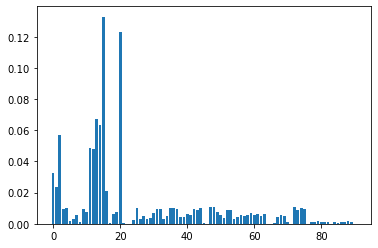

In [39]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()